In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.shape

(891, 12)

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##
### Key Questions :
### - Were women more likely to survive than men?
### - Did a passenger’s class affect their chance of survival?
### - Was age a significant factor in survival?
##


####  Cleaning and Preparing the Data

In [9]:
data.drop("PassengerId",axis=1,inplace=True)

In [10]:
age_by_sex = data.groupby("Sex")["Age"].transform("mean")
age_by_sex 

0      30.726645
1      27.915709
2      27.915709
3      27.915709
4      30.726645
         ...    
886    30.726645
887    27.915709
888    27.915709
889    30.726645
890    30.726645
Name: Age, Length: 891, dtype: float64

In [11]:
data["Age"] = data["Age"].fillna(age_by_sex)
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
data.groupby("Pclass")["Fare"].agg(["mean","std"])

,mean,std
Pclass,,
1,84.154687,78.380373
2,20.662183,13.417399
3,13.675550,11.778142


In [13]:
data[data["Embarked"].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
data.dropna(subset="Embarked",inplace=True)
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

### Data Visualization

##### Were women more likely to survive than men

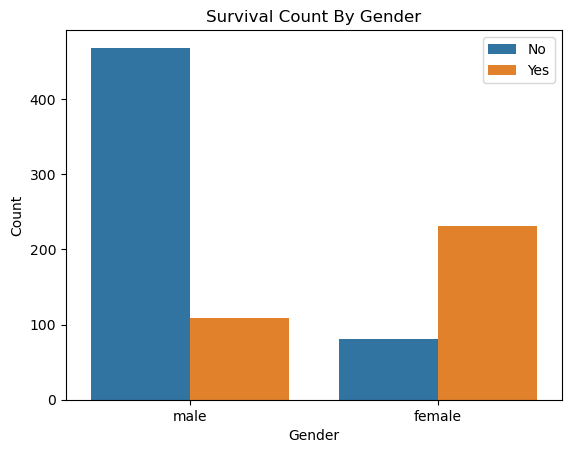

In [22]:
ax = sns.countplot(data=data,x="Sex",hue="Survived")
ax.set_title("Survival Count By Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.legend(labels=["No","Yes"])

The graph above shows that women have a higher survival rate than men. While the survival rate for women is higher than the death rate, the opposite is true for men, with fewer survivors.

#

##### Did a passenger’s class affect their chance of survival?

In [24]:
data["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

In [32]:
data.groupby("Pclass")[["Pclass","Survived"]].agg("sum")

,Pclass,Survived
Pclass,,
1,214,134
2,368,87
3,1473,119


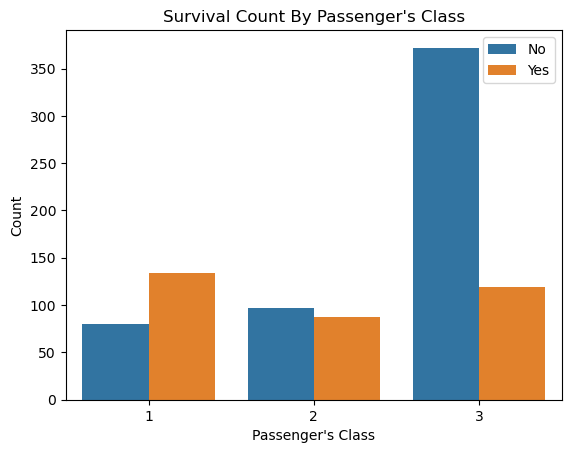

In [29]:
ax = sns.countplot(data=data,x="Pclass",hue="Survived")
ax.set_title("Survival Count By Passenger's Class")
ax.set_xlabel("Passenger's Class")
ax.set_ylabel("Count")
ax.legend(labels=["No","Yes"])

While the survival rate for first-class passengers is slightly positive, the probability of survival for second-class passengers is almost fifty percent. However, when we look at third-class passengers, we see that things get worse. The survival rate for third-class passengers is very low. This shows that the passenger class is directly proportional to survival. If you're a first- or second-class passenger, your survival rate is relatively good. But if you're a third-class passenger, it's below ten percent.
#

##### Was age a significant factor in survival?

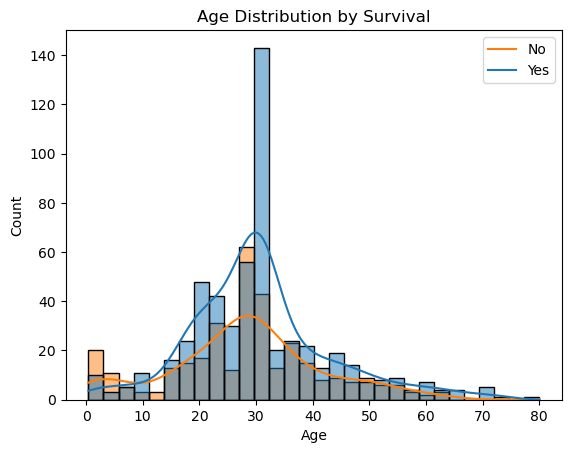

In [46]:
ax = sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
ax.legend(labels=["No","Yes"])
plt.show()

When we look at the graph above, we see that the survival rate of young passengers is higher. However, in order to make such an evaluation, the fact that gender and passenger classes were not included in the evaluation in the previous graphs does not provide clear information by just looking at age.
#

### Regressions

In [48]:
data = data.drop(columns=["Cabin","Name","Ticket"])
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [49]:
#label coding for 'sex' column

le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])

data["Sex"] 
#male 1 
#female 0

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [50]:
#one hot encoding for 'embarked column' 
data = pd.get_dummies(data,columns=["Embarked"], dtype=int)


In [51]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,27.915709,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


In [52]:
#Train Test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=0.2,random_state=42)

In [56]:
#Feature Scaling for Fare and Age
ss = StandardScaler()
X_train[["Fare","Age"]] = ss.fit_transform(X_train[["Fare","Age"]])
X_test[["Fare","Age"]] = ss.transform(X_test[["Fare","Age"]])

In [78]:
#Logistic regression model setup
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)

LRPredict = classifier.predict(X_test)

LRPredict,np.array(y_test)

In [68]:
accur_score = accuracy_score(y_test,LRPredict)
conf_matrix = confusion_matrix(y_test,LRPredict)
accur_score,conf_matrix

(0.7808988764044944,
 array([[85, 24],
        [15, 54]]))

In [103]:
coefficients = classifier.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "AbsoluteCoefficient": np.abs(coefficients)
})

coef_df = coef_df.sort_values(by="AbsoluteCoefficient",ascending=False)
coef_df

,Feature,Coefficient,AbsoluteCoefficient
1,Sex,-2.615840,2.615840
0,Pclass,-1.125558,1.125558
2,Age,-0.574481,0.574481
3,SibSp,-0.380883,0.380883
8,Embarked_S,-0.307970,0.307970
6,Embarked_C,0.201251,0.201251
7,Embarked_Q,0.112029,0.112029
5,Fare,0.079988,0.079988
4,Parch,-0.056088,0.056088


#
## Results of Regression Model

When we look at our model's accuracy score, we see a correctness rate of approximately 80%. This shows that the model is quite robust. Since the model depends on multiple independent variables, when we examined which variables most significantly influence our results, we found that:
1. Gender
2. Passenger class
3. Age

variables most significantly affect our results.

note : And don't fotget David De Gea could save the titanic